In [1]:
from plotly.subplots import make_subplots

In [2]:
import plotly.express as px

In [3]:
import pandas as pd

In [4]:
import math

## ALL ServiceNow tickets by department

In [5]:
fh1 = '../data-display/tickets-per-dept-yearly.csv'
df = pd.read_csv(fh1)

In [6]:
cols = 3
rows = math.ceil(df['dept'].value_counts().shape[0] / cols)

In [7]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [8]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

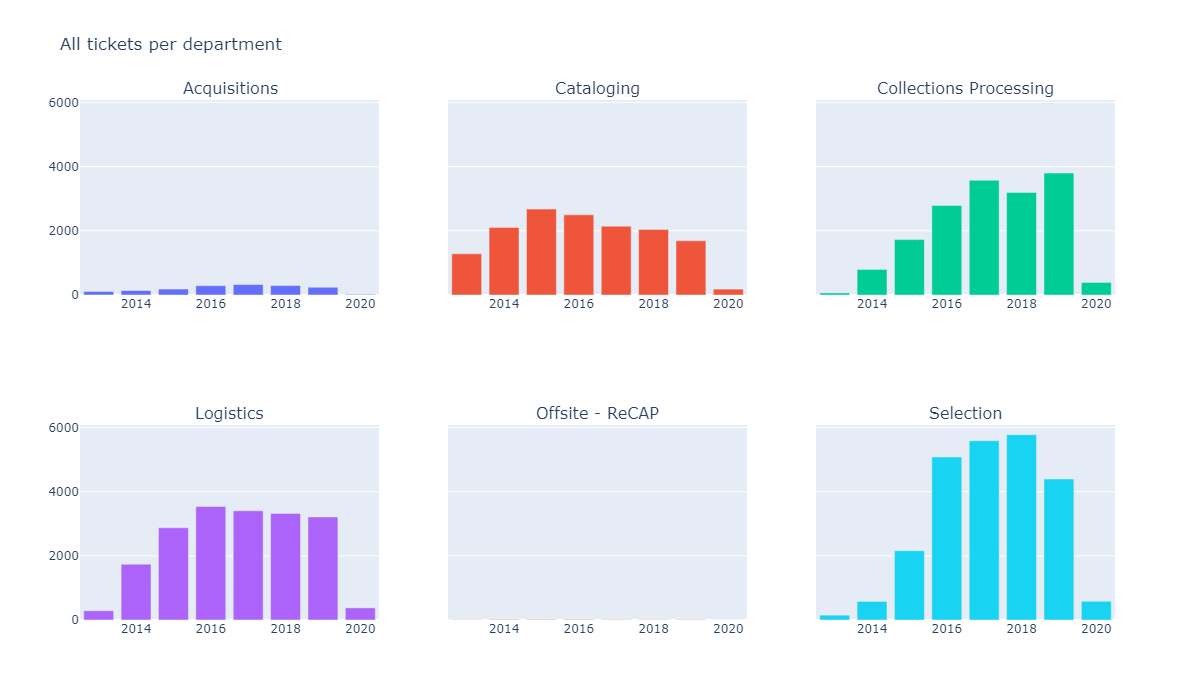

In [10]:
fig.update_layout(
    title_text='All tickets per department',
    showlegend=False,
    height=700, width=1200)
fig.show()

## Unresolved tickets by department

In [11]:
fh2 = '../data-display/unresolved-per-dept-yearly.csv'
df = pd.read_csv(fh2)

In [12]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [13]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

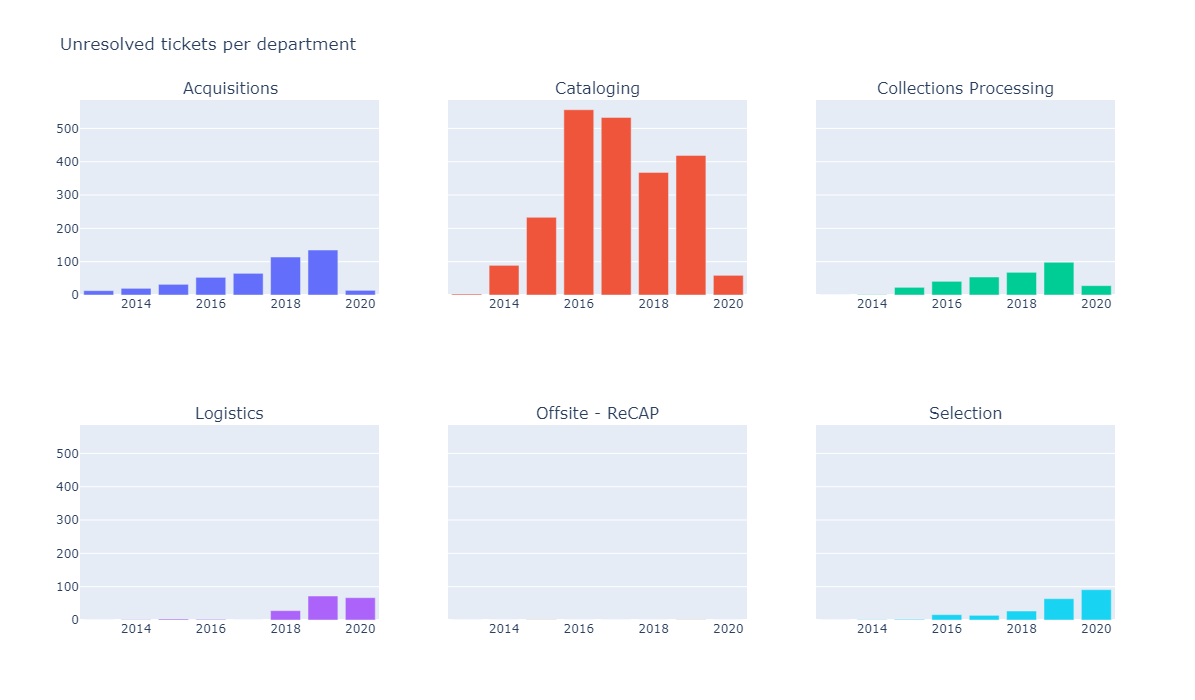

In [15]:
fig.update_layout(
    title_text='Unresolved tickets per department',
    showlegend=False,
    height=700, width=1200)
fig.show()

## CAT ServiceNow tickets by status

In [20]:
fh3 = '../data-display/cat-tickets-per-state-yearly.csv'
df = pd.read_csv(fh3)
df = df.sort_values('stack_order')

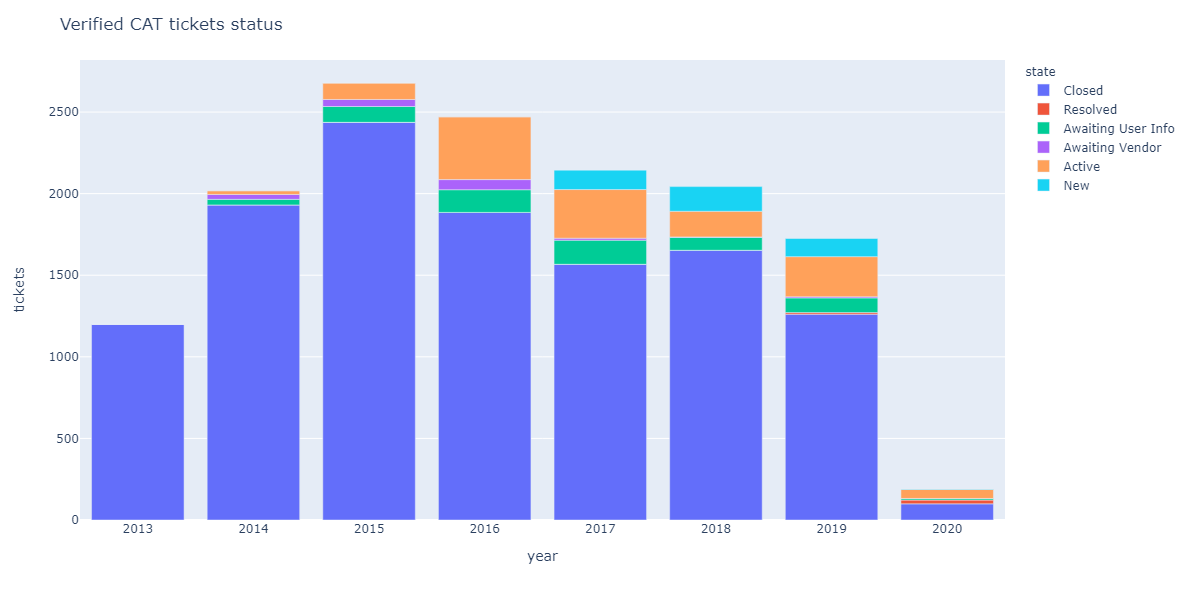

In [21]:
fig = px.bar(df, x='year', y='tickets', color='state')
fig.update_layout(title_text="Verified CAT tickets status", height=600, width=1000)
fig.show()

## Misassigned CAT tickets

In [31]:
fh4 = '../data-display/cat-tickets-misassigned.csv'
df = pd.read_csv(fh4)

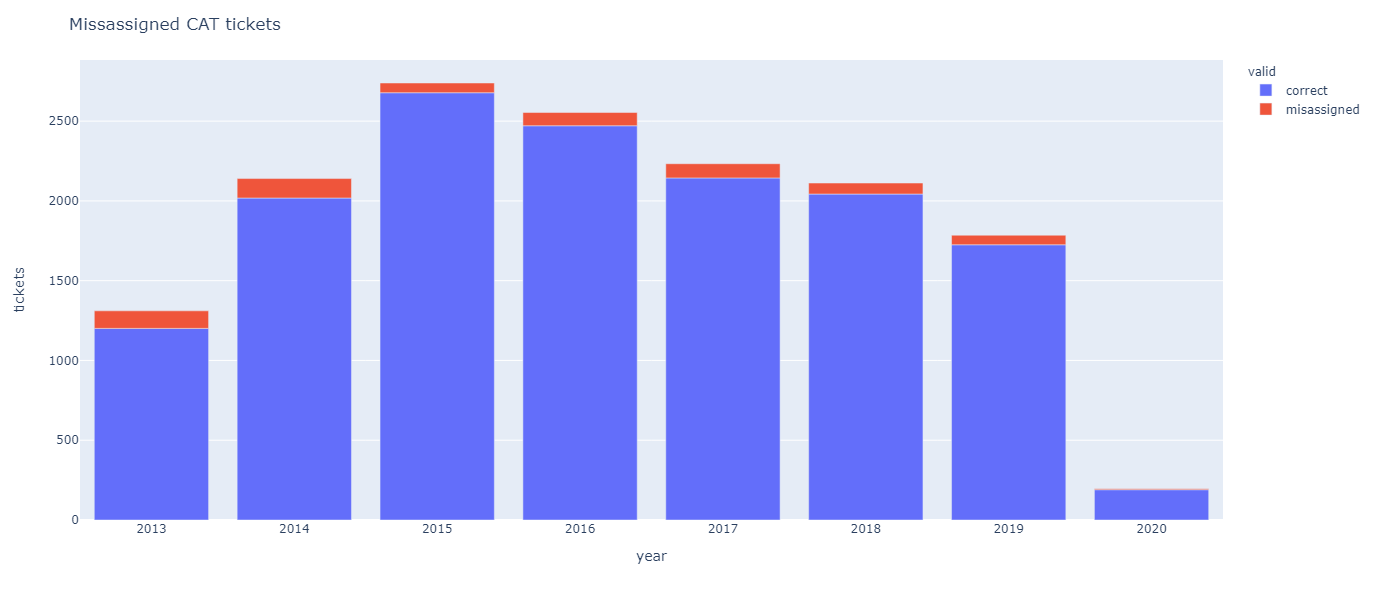

In [33]:
fig = px.bar(df, x='year', y='tickets', color='valid')
fig.update_layout(title_text="Missassigned CAT tickets", height=600, width=1000, showlegend=True)
fig.show()

## CAT tickets backlog gap